# Common Decompositions
The goal of this method is to replace a complicated problem with several easy ones. If the decomposition doesn't simplify the situation in some way, then nothing has been gained. In this notebook four types of decompositions are presented:

1. Impulse Decomposition
2. Step Decomposition
3. Even/Odd Decomposition
4. Interlaced Decomposition

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

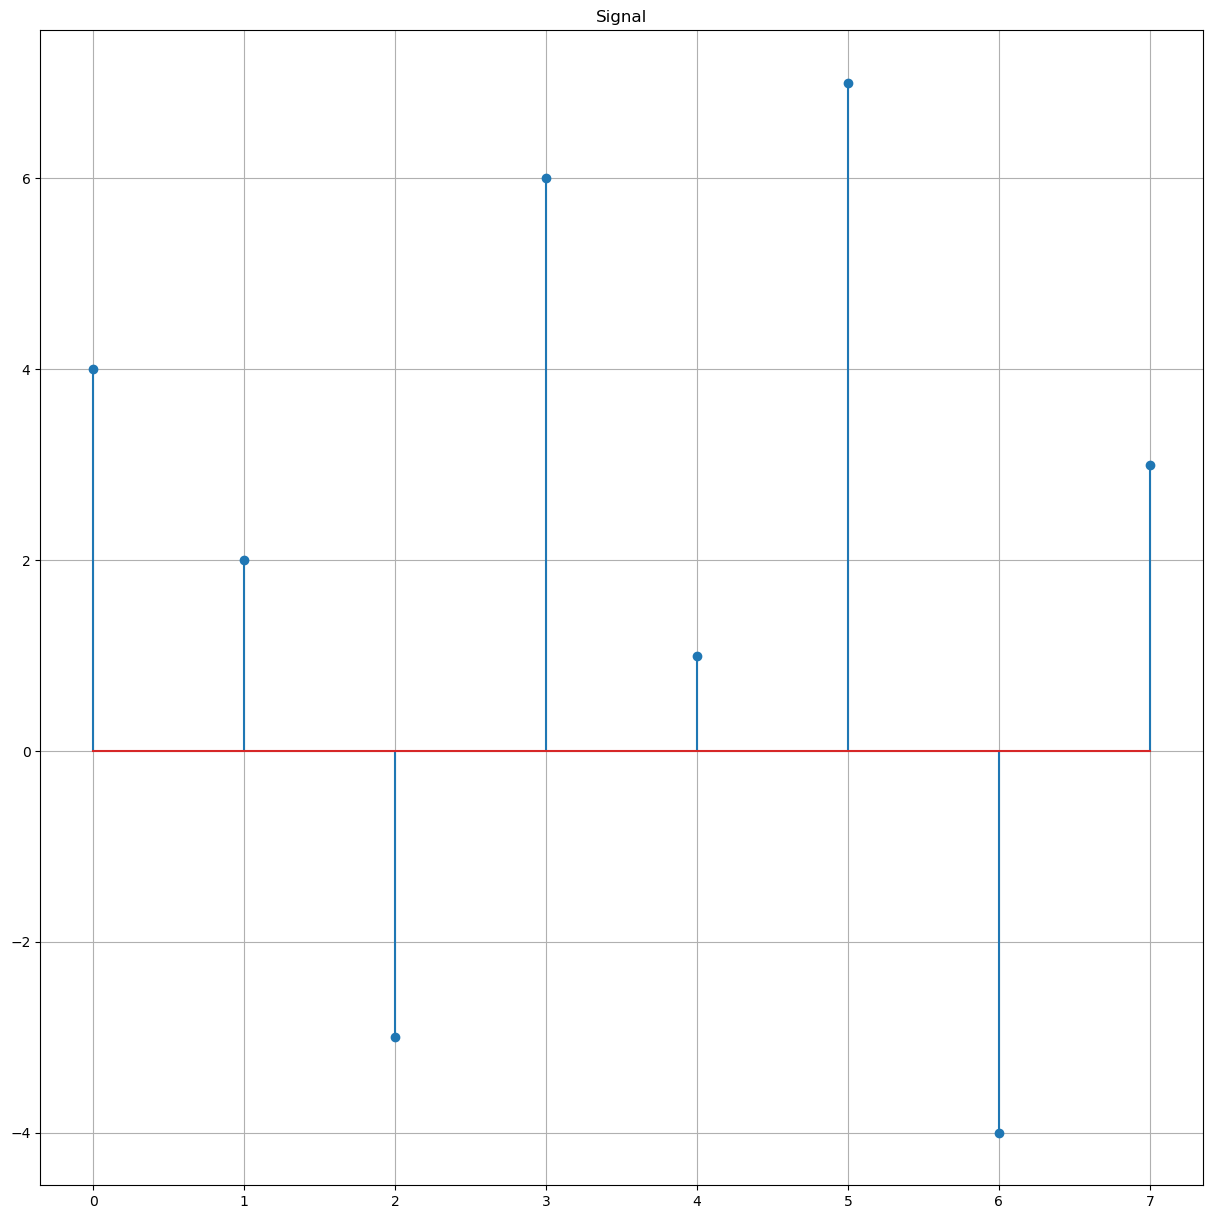

In [44]:
x = np.array([[4,2,-3,6,1,7,-4, 3]])

plt.stem(x.reshape(-1,1))
plt.grid('on')
plt.title('Signal')
plt.show()

## 1. Impulse Decomposition
Impulse decomposition breaks an $N$ samples signal into $N$ component signals, each containing $N$ samples. Each of the component signals contains one point from the original signal, with the remainder of the values being zero. A single nonzero point in a string of zeros is called an impulse. Impulse decomposition is important because it **allows signals to be examined one sample at a time**. Similarly, systems are characterized by how they respond to impulses. By knowing how a system responds to an impulse, the system's output can be calculated for any given input. 

In [45]:
N = x.shape[1]
x_impulse = np.zeros((N,N))

In [46]:
# Create a matrix called x_impulse with main diagonal equal to x
# YOUR CODE HERE
x = np.array([1, 2, 3])

N = x.shape[0]

np.fill_diagonal(x_impulse, x)

# Print the result

print(x_impulse)

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 0. 0. 0.]
 [0. 0. 3. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 0. 3. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 2.]]


In [47]:
e = np.eye(N,N)
np.fill_diagonal(e, x)

assert np.isclose(x_impulse, e).all()

ValueError: operands could not be broadcast together with shapes (8,8) (3,3) 

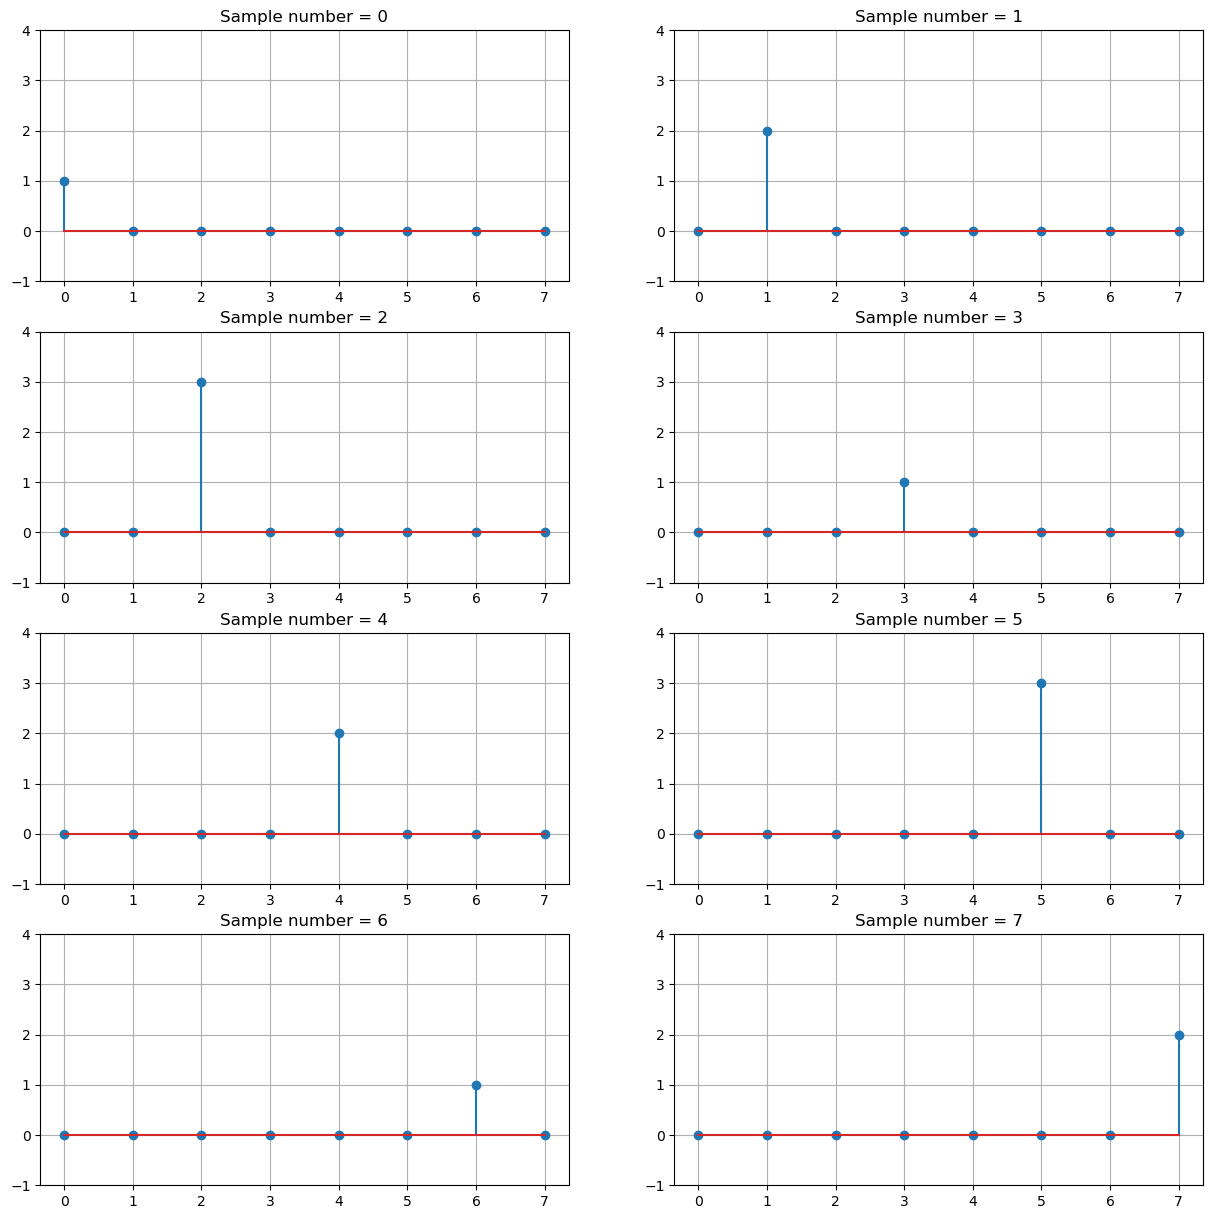

In [48]:
plt.rcParams['figure.figsize'] = (15,15)
rows = 4
cols = 2
plt.subplots(rows,cols)

y_max = np.max(x_impulse) + 1
y_min = np.min(x_impulse) - 1

for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.stem(x_impulse[i,:])
    plt.ylim([y_min, y_max])
    plt.title(f'Sample number = {i}')
    plt.grid('on')

## 2. Step Decomposition
Step decomposition also breaks an $N$ sample signal into $N$ component signals, each composed of $N$ samples. Each component signal is a step, that is, the first samples have a value of zero, while the last samples are some constant value. Consider the decomposition of an $N$ point signal, $x[n]$, into the components: $x_0[n], x_1[n], x_2[n], \dots, x_{N-1}[n]$. The $k^{th}$ component signal, $x_k[n]$, is composed of zeros for points $0$ through $k - 1$, while the remaining points have a value of: $x[k] - x[k-1]$. 

In [49]:
x_step = np.zeros((N,N))

In [53]:
# Create a matrix called x_step with step decomposition. Note that main diagonal should be 
# equal to x[k]-x[k-1] but the upper matrix is non zero.
# YOUR CODE HERE

x_s = np.zeros(N)

for i in range (N):
    if i != 0:
        x_s[i]=x[0][i-1]
        
x_st = x - x_s

for i in range (N):
    for j in range (N):
        if j >=i:
            x_step[i][j]= x_st[0][i]

print(x_step)

IndexError: invalid index to scalar variable.

In [ ]:
e = np.eye(N,N)
np.fill_diagonal(e, x.flatten() - np.append(0, x.flatten()[:-1]))

for i in range(N):
    e[i, i+1:] = e[i][i]

assert np.isclose(x_step, e).all()

In [ ]:
plt.rcParams['figure.figsize'] = (15,15)
rows = 4
cols = 2
plt.subplots(rows,cols)

y_max = np.max(x_step) + 1
y_min = np.min(x_step) - 1

for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.stem(x_step[i,:])
    plt.ylim([y_min, y_max])
    plt.title(f'Sample number = {i}')
    plt.grid('on')

## 3. Even/Odd Decomposition
The even/odd decomposition breaks a signal into two component signals, one having **even symmetry** and the other having **odd symmetry**. An N point signal is said to have even symmetry if it is a mirror image around point $N/2$. Odd symmetry occurs when the matching points have equal magnitudes but are opposite in sign.

The following definitions assume that the signal is composed of an **even number of samples**, and that the indexes run from $0$ to $N-1$. The decomposition is calculated form the relations:

$$x_E[n]=\frac{x[n]+x[N-n]}{2}$$

$$x_O[n]=\frac{x[n]-x[N-n]}{2}$$

In [64]:
def circular_flip(x):
    """ 
    Function that flips an array x in a circular form.
  
    Parameters: 
    x (numpy array): Array of numbers representing the input signal to be transformed.
  
    Returns: 
    numpy array: Returns flipped values of an input x in the form [x[0], x[N-1], x[N-2] ... x[1]]
    """ 

    # YOUR CODE HERE
    N = len(x)
    
    flipped_x = np.empty_like(x)
    
    for i in range(N):
        flipped_x[i] = x[N - 1 - i]
        
    return flipped_x

In [66]:
x = np.array([0,1,2,3,4,5])


# calculate
# x_N: circular flip of x
# x_E: even symmetry of x
# x_O: odd symmetry of x
# YOUR CODE HERE

x_N = circular_flip(x)
print(x_N)

[5 4 3 2 1 0]


In [ ]:
assert np.equal(x_E + x_O, x).all()

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)

y_max = np.max([(x_E + x_O), x_E, x_O]) + 1
y_min = np.min([(x_E + x_O), x_E, x_O]) - 1

plt.subplot(1,3,1)
plt.stem(x_E.reshape(-1))
plt.ylim([y_min, y_max])
plt.title('Even Decomposition of x')
plt.grid('on')

plt.subplot(1,3,2)
plt.stem(x_O.reshape(-1))
plt.ylim([y_min, y_max])
plt.title('Odd Decomposition of x')
plt.grid('on')

plt.subplot(1,3,3)
plt.stem((x_E + x_O).reshape(-1))
plt.ylim([y_min, y_max])
plt.title('Signal x')
plt.grid('on')
plt.show()

For an **odd number of samples**, and that the indexes run from $0$ to $𝑁−1$. The decomposition is calculated as follows:

In [ ]:
x = np.array([[0,1,2,3,4,5,6]])
x_N = np.flip(x) #Note that there is no circular flip

x_E = (x + x_N)/2.0
x_O = (x - x_N)/2.0

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)

y_max = np.max([(x_E + x_O), x_E, x_O]) + 1
y_min = np.min([(x_E + x_O), x_E, x_O]) - 1

plt.subplot(1,3,1)
plt.stem(x_E.reshape(-1))
plt.ylim([y_min, y_max])
plt.title('Even Decomposition of x')
plt.grid('on')

plt.subplot(1,3,2)
plt.stem(x_O.reshape(-1))
plt.ylim([y_min, y_max])
plt.title('Odd Decomposition of x')
plt.grid('on')

plt.subplot(1,3,3)
plt.stem((x_E + x_O).reshape(-1))
plt.ylim([y_min, y_max])
plt.title('Signal x')
plt.grid('on')
plt.show()

## 4. Interlaced Decomposition
The interlaced decomposition breaks the signal into two component signals, the even sample signal and the odd sample signal (not to be confused with even and odd symmetry signals). To find the even sample signal, start with the original signal and set all of the odd numbered samples to zero. To find the odd sample signal, start with the original signal and set all of the even numbered samples to zero.

At first glance, this decomposition might seem trivial and uninteresting. This is ironic, because the interlaced decomposition is the basis for an extremely important algorithm in DSP, the Fast Fourier Transform (FFT). The procedure for calculating the Fourier decomposition has been know for several hundred years. Unfortunately, it is frustratingly slow, often requiring minutes or hours to execute on present day computers. The FFT is a family of algorithms developed in the 1960s to reduce this computation time. The strategy is an exquisite example of DSP: **reduce the signal to elementary components by repeated use of the interlace transform**; **calculate the Fourier decomposition of the individual components**; **synthesized the results into the final answer**. The results are dramatic; it is common for the speed to be improved by a factor of hundreds or thousands.

In [ ]:
x_E = np.zeros(x.shape)
x_O = np.zeros(x.shape)

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert np.equal(x_E + x_O, x).all()

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)

y_max = np.max([(x_E + x_O), x_E, x_O]) + 1
y_min = np.min([(x_E + x_O), x_E, x_O]) - 1

plt.subplot(1,3,1)
plt.stem(x_E.reshape(-1))
plt.ylim([y_min, y_max])
plt.title('Even Decomposition of x')
plt.grid('on')

plt.subplot(1,3,2)
plt.stem(x_O.reshape(-1))
plt.ylim([y_min, y_max])
plt.title('Odd Decomposition of x')
plt.grid('on')

plt.subplot(1,3,3)
plt.stem((x_E + x_O).reshape(-1))
plt.ylim([y_min, y_max])
plt.title('Signal x')
plt.grid('on')
plt.show()

## Exercise for Common Decompositions
For a given input signal x calculate the:
1. Impulse Decomposition
2. Step Decomposition
3. Even/Odd Decomposition
4. Interlaced Decomposition

by calling the functions `impulse`, `step`, `even_odd` and `interlaced`

In [ ]:
def impulse(x):
    """ 
    Function that calculates the impulse decomposition of a signal x.
  
    Parameters: 
    x (numpy array): Array of numbers representing the input signal to be decomposed.
  
    Returns: 
    numpy array: Returns a matrix of size x.shape[1] by x.shape[1] where each row represents 
    the impulse decomposition of the n-th sample.
    """
    # YOUR CODE HERE
    raise NotImplementedError()
        
    return impulse_decomposition


def step(x):
    """ 
    Function that calculates the step decomposition of a signal x.
  
    Parameters: 
    x (numpy array): Array of numbers representing the input signal to be decomposed.
  
    Returns: 
    numpy array: Returns a matrix of size x.shape[1] by x.shape[1] where each row represents 
    the step decomposition of the n-th sample.
    """
    
    # YOUR CODE HERE
    raise NotImplementedError()
    
    return step_decomposition


def even_odd(x):
    """ 
    Function that calculates the even/odd decomposition of a signal x.
  
    Parameters: 
    x (numpy array): Array of numbers representing the input signal to be decomposed.
  
    Returns: 
    x_E (numpy array): Array representing the even decomposition of signal x 
    x_O (numpy array): Array representing the odd decomposition of signal x 
    """
    
    # YOUR CODE HERE
    raise NotImplementedError()
    
    return x_E, x_O


def interlaced(x):
    """ 
    Function that calculates the interlaced decomposition of a signal x.
  
    Parameters: 
    x (numpy array): Array of numbers representing the input signal to be decomposed.
  
    Returns: 
    x_E (numpy array): Array representing the even-interlaced decomposition of signal x 
    x_O (numpy array): Array representing the odd-interlaced decomposition of signal x 
    """
    
    # YOUR CODE HERE
    raise NotImplementedError()
    
    return x_E, x_O    

## Test your functions
To test your implementations two test cases are provided in the `solution_common_decompositions.pkl` pickle file.

In [ ]:
with open('solution_common_decompositions.pkl', 'rb') as file:
    solution = pickle.load(file)

### Test even number of samples
First you will test your implementation using an even number of samples with a random seed of 1. If everything works correctly you should pass all the assert statements.

In [ ]:
np.random.seed(1)
x1 = np.random.rand(1,200)

x_impulse = impulse(x1)
assert(np.array_equal(x_impulse, solution['X1']['x_impulse'])), 'error in impulse function'

x_step = step(x1)
assert(np.array_equal(x_step, solution['X1']['x_step'])), 'error in step function'

x_E, x_O = even_odd(x1)
assert(np.array_equal(x_E, solution['X1']['x_E'])), 'error in even/odd decomposition function'
assert(np.array_equal(x_O, solution['X1']['x_O'])), 'error in even/odd decomposition function'

x_iE, x_iO = interlaced(x1)
assert(np.array_equal(x_iE, solution['X1']['x_iE'])), 'error in interlaced decomposition function'
assert(np.array_equal(x_iO, solution['X1']['x_iO'])), 'error in interlaced decomposition function'

### Test odd number of samples
Secondly you will test your implementation using an odd number of samples with a random seed of 1. If everything works correctly you should pass all the assert statements.

In [ ]:
np.random.seed(1)
x2 = np.random.rand(1,201)

x_impulse = impulse(x2)
assert(np.array_equal(x_impulse, solution['X2']['x_impulse'])), 'error in impulse function'

x_step = step(x2)
assert(np.array_equal(x_step, solution['X2']['x_step'])), 'error in step function'

x_E, x_O = even_odd(x2)
assert(np.array_equal(x_E, solution['X2']['x_E'])), 'error in even/odd decomposition function'
assert(np.array_equal(x_O, solution['X2']['x_O'])), 'error in even/odd decomposition function'

x_iE, x_iO = interlaced(x2)
assert(np.array_equal(x_iE, solution['X2']['x_iE'])), 'error in interlaced decomposition function'
assert(np.array_equal(x_iO, solution['X2']['x_iO'])), 'error in interlaced decomposition function'

#### References:

http://www.dspguide.com/ch5/7.htm